In [1]:
import pandas as pd
data_base = pd.read_csv("changed_selected_93_08_NIGMS_R01_base_1993ppid.csv",encoding="latin-1")

In [5]:
data_base.columns

Index(['NIH.Spending.Categorization', 'Project.Abstract', 'Project.Terms',
       'Project.Title', 'Public.Health.Relevance', 'Administering..IC',
       'Application.ID', 'Award.Notice.Date', 'FOA', 'Project.Number', 'Type',
       'Activity', 'IC', 'Serial.Number', 'Support.Year', 'Suffix',
       'Program.Official.Information', 'Project.Start.Date',
       'Project.End.Date', 'Study.Section', 'Subproject.Number',
       'Contact.PI..Person.ID', 'Contact.PI...Project.Leader',
       'Other.PI.or.Project.Leader.s.', 'Congressional.District', 'Department',
       'DUNS.Number', 'FIPS', 'Latitude', 'Longitude', 'Organization.Name',
       'Organization.City', 'Organization.State', 'Organization.Type',
       'Organization.Zip', 'Organization.Country', 'ARRA.Indicator',
       'Budget.Start.Date', 'Budget.End.Date', 'CFDA.Code',
       'Funding.Mechanism', 'FY', 'Funding.IC', 'FY.Direct.Costs',
       'FY.Indirect.Costs', 'FY.Total.Cost.by.IC',
       'FY.Total.Cost..Sub.Projects.'],
   

In [2]:
database=data_base[['Project.Number','Type','FY']]
database.columns=['Project_Number','Type','FY']
database.head()

,Project_Number,Type,FY
0,5R01GM046926-02,5,1993
1,1R01GM048560-01,1,1993
2,5R01GM047286-02,5,1993
3,5R01GM036143-07,5,1993
4,1R01GM049321-01,1,1993


In [3]:
database['Project_Number']=database['Project_Number'].str[6:12].astype(int)

/home/zhuyunning/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
database=database.sort(['Project_Number','FY'], ascending=True).reset_index(drop=True)
database.head()

/home/zhuyunning/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Project_Number,Type,FY
0,91,5,1993
1,91,5,1994
2,91,5,1995
3,91,2,1996
4,91,5,1997


In [5]:
len(database)

27368

In [6]:
gap = []
for i in range(len(database)-1):
    n=database.Project_Number.tolist()
    m=database.FY.tolist()
    if n[i+1]-n[i]==0:
        a=m[i+1]-m[i]
        if a>1:
            gap.append(a)
        else:
            gap.append(0)
    else:
        if m[i]!=2008:
            b=2008-m[i]
            gap.append(b)
        else:
            gap.append(0)
    i=i+1
len(gap)

27367

In [7]:
database.tail()

,Project_Number,Type,FY
27363,86639,1,2008
27364,86854,9,2008
27365,86877,9,2008
27366,87137,9,2008
27367,87738,1,2008


In [7]:
gap.insert(27367,0)
len(gap)

27368

In [8]:
Gap=pd.Series(gap)
database['Gap'] = Gap.values
database.head()

,Project_Number,Type,FY,Gap
0,91,5,1993,0
1,91,5,1994,0
2,91,5,1995,0
3,91,2,1996,0
4,91,5,1997,0


In [9]:
re_entry=[]
for i in range(len(database)-1):
    n=database.Project_Number.tolist()
    m=database.FY.tolist()
    if n[i+1]-n[i]!=0:
        if m[i]<2008:
            re_entry.append(0)
        else:
            re_entry.append(1)
    else:
        re_entry.append(1)
    i=i+1
len(re_entry)

27367

In [10]:
re_entry.insert(27367,1)
len(re_entry)

27368

In [11]:
Re_entry=pd.Series(re_entry)
database['Re_Entry'] = Re_entry.values
database.head()

,Project_Number,Type,FY,Gap,Re_Entry
0,91,5,1993,0,1
1,91,5,1994,0,1
2,91,5,1995,0,1
3,91,2,1996,0,1
4,91,5,1997,0,1


In [12]:
data_new=database[['Gap','Re_Entry']]
data_new=data_new[data_new.Gap!= 0]
data_new.head()

,Gap,Re_Entry
14,1,0
20,12,0
28,7,0
35,9,0
37,2,1


In [13]:
len(data_new)

4063

In [15]:
from statsmodels.formula.api import logit 
logitModel = logit("Re_Entry~Gap", data =data_new)
Fit=logitModel.fit()
Fit.summary()

Optimization terminated successfully.
         Current function value: 0.377282
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Re_Entry   No. Observations:                 4063
Model:                          Logit   Df Residuals:                     4061
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Mar 2017   Pseudo R-squ.:                  0.3687
Time:                        21:04:05   Log-Likelihood:                -1532.9
converged:                       True   LL-Null:                       -2428.1
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5634      0.080     19.516      0.000       1.406       1.720
Gap           -0.5300      0.021    -25.281      0.000      -0.571      -0.489
==============================================================================
"""

In [17]:
import numpy as np
data_new["PredX"]=Fit.fittedvalues
data_new["PredP"]=np.exp(data_new["PredX"]) / (1+np.exp(data_new["PredX"]))
data_new.head()

,Gap,Re_Entry,PredX,PredP
14,1,0,1.033473,0.737589
20,12,0,-4.796192,0.008193
28,7,0,-2.146344,0.104673
35,9,0,-3.206283,0.038930
37,2,1,0.503504,0.623282


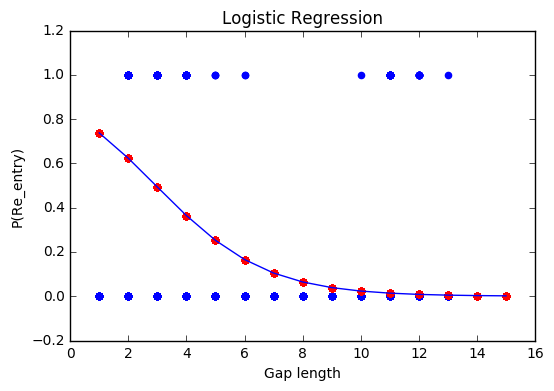

In [20]:
import matplotlib.pyplot as plt
data_new= data_new.sort_values('PredP', ascending=True)
plt.scatter(data_new["Gap"],data_new["Re_Entry"], color=['blue'])
plt.scatter(data_new["Gap"],data_new["PredP"], color=['red'])
plt.plot(data_new["Gap"],data_new["PredP"])
plt.xlabel("Gap length")
plt.ylabel("P(Re_entry)")
plt.title("Logistic Regression")
plt.show()